# Dissecting Spotify Valence

Spotify offers some metrics regarding each song, for instance danceability, instrumentalness, acousticness. Among them is also *valence*, which was introduced in 2014 by a company and counts the happiness of a song. 

The purpose of this analysis is to explore whether the other metrics contribute to the calculation of valence using traditional statistics and machine learning techniques.

---

> Natalia Katsiapi <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> t8180040@aueb.gr

The first step is to import some needed libraries. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from plotnine import *

Then, we load the data created in `get_data.ipynb`. They are in a different notebook, because we got songs from search results, which depend on the user's account. Thus, it is not guaranteed that the same file of songs will be created even if we add a seed in the process.

In [2]:
df = pd.read_csv("songs15000.csv")
df

,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id_x,uri,track_href,analysis_url,duration_ms,time_signature,id_y,title,main_artist
0,5w3CRkbTWXfbYepIdFpGUN,0.723,0.669,0.0,-6.784,1.0,0.0348,0.0522,0.183000,0.1090,...,audio_features,5w3CRkbTWXfbYepIdFpGUN,spotify:track:5w3CRkbTWXfbYepIdFpGUN,https://api.spotify.com/v1/tracks/5w3CRkbTWXfb...,https://api.spotify.com/v1/audio-analysis/5w3C...,224133.0,4.0,5w3CRkbTWXfbYepIdFpGUN,On Hold,The xx
1,2LJRoFOtMGLnSxJqlJuhge,0.858,0.634,0.0,-4.058,1.0,0.0286,0.5180,0.000000,0.2360,...,audio_features,2LJRoFOtMGLnSxJqlJuhge,spotify:track:2LJRoFOtMGLnSxJqlJuhge,https://api.spotify.com/v1/tracks/2LJRoFOtMGLn...,https://api.spotify.com/v1/audio-analysis/2LJR...,164360.0,3.0,2LJRoFOtMGLnSxJqlJuhge,Tranquilito,Gerardo Ortiz
2,1XZMileUddtQ2XwTMfUL3n,0.572,0.810,1.0,-5.791,0.0,0.0557,0.0147,0.000007,0.1300,...,audio_features,1XZMileUddtQ2XwTMfUL3n,spotify:track:1XZMileUddtQ2XwTMfUL3n,https://api.spotify.com/v1/tracks/1XZMileUddtQ...,https://api.spotify.com/v1/audio-analysis/1XZM...,214912.0,4.0,1XZMileUddtQ2XwTMfUL3n,Summertime Sadness (Lana Del Rey Vs. Cedric Ge...,Lana Del Rey
3,2ccuOtUjIyx3tPcsnpeBzJ,0.527,0.461,7.0,-5.908,1.0,0.0269,0.1180,0.000000,0.0831,...,audio_features,2ccuOtUjIyx3tPcsnpeBzJ,spotify:track:2ccuOtUjIyx3tPcsnpeBzJ,https://api.spotify.com/v1/tracks/2ccuOtUjIyx3...,https://api.spotify.com/v1/audio-analysis/2ccu...,214405.0,3.0,2ccuOtUjIyx3tPcsnpeBzJ,Flower Shops (feat. Morgan Wallen),ERNEST
4,05CrK6Q5VGtfPDtyQFJ4Kf,0.512,0.526,1.0,-5.440,1.0,0.0251,0.0724,0.000000,0.0675,...,audio_features,05CrK6Q5VGtfPDtyQFJ4Kf,spotify:track:05CrK6Q5VGtfPDtyQFJ4Kf,https://api.spotify.com/v1/tracks/05CrK6Q5VGtf...,https://api.spotify.com/v1/audio-analysis/05Cr...,226330.0,4.0,05CrK6Q5VGtfPDtyQFJ4Kf,Sad Song (feat. Elena Coats),We The Kings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15004,4wo0NtF3OzPrYiugNbUDvT,0.810,0.784,3.0,-3.223,0.0,0.0622,0.0874,0.000166,0.0830,...,audio_features,4wo0NtF3OzPrYiugNbUDvT,spotify:track:4wo0NtF3OzPrYiugNbUDvT,https://api.spotify.com/v1/tracks/4wo0NtF3OzPr...,https://api.spotify.com/v1/audio-analysis/4wo0...,254907.0,4.0,4wo0NtF3OzPrYiugNbUDvT,Ahora,J Balvin
15005,630Ug0XtmhhFvAKo0PNuEI,0.840,0.344,5.0,-8.613,0.0,0.0374,0.4560,0.000034,0.3500,...,audio_features,630Ug0XtmhhFvAKo0PNuEI,spotify:track:630Ug0XtmhhFvAKo0PNuEI,https://api.spotify.com/v1/tracks/630Ug0XtmhhF...,https://api.spotify.com/v1/audio-analysis/630U...,199227.0,4.0,630Ug0XtmhhFvAKo0PNuEI,Remember Me,UMI
15006,5HujDMiRNqZwEzVAh3oFD3,0.733,0.784,3.0,-5.211,1.0,0.0606,0.0927,0.000000,0.1950,...,audio_features,5HujDMiRNqZwEzVAh3oFD3,spotify:track:5HujDMiRNqZwEzVAh3oFD3,https://api.spotify.com/v1/tracks/5HujDMiRNqZw...,https://api.spotify.com/v1/audio-analysis/5Huj...,164000.0,4.0,5HujDMiRNqZwEzVAh3oFD3,farfalle,sangiovanni
15007,439TlnnznSiBbQbgXiBqAd,0.487,0.729,2.0,-6.815,1.0,0.2710,0.0538,0.000004,0.4400,...,audio_features,439TlnnznSiBbQbgXiBqAd,spotify:track:439TlnnznSiBbQbgXiBqAd,https://api.spotify.com/v1/tracks/439TlnnznSiB...,https://api.spotify.com/v1/audio-analysis/439T...,350120.0,4.0,439TlnnznSiBbQbgXiBqAd,m.A.A.d city,Kendrick Lamar


## Exporing which Features Influence Valence with Regression

We will keep only the needed columns.

In [3]:
song_metrics = pd.concat([df.loc[:, "danceability":"tempo"], df.loc[:, "duration_ms":"time_signature"]], axis=1)
song_metrics

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.723,0.669,0.0,-6.784,1.0,0.0348,0.0522,0.183000,0.1090,0.349,125.053,224133.0,4.0
1,0.858,0.634,0.0,-4.058,1.0,0.0286,0.5180,0.000000,0.2360,0.909,110.030,164360.0,3.0
2,0.572,0.810,1.0,-5.791,0.0,0.0557,0.0147,0.000007,0.1300,0.106,126.045,214912.0,4.0
3,0.527,0.461,7.0,-5.908,1.0,0.0269,0.1180,0.000000,0.0831,0.227,128.153,214405.0,3.0
4,0.512,0.526,1.0,-5.440,1.0,0.0251,0.0724,0.000000,0.0675,0.249,85.024,226330.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15004,0.810,0.784,3.0,-3.223,0.0,0.0622,0.0874,0.000166,0.0830,0.817,88.001,254907.0,4.0
15005,0.840,0.344,5.0,-8.613,0.0,0.0374,0.4560,0.000034,0.3500,0.526,111.994,199227.0,4.0
15006,0.733,0.784,3.0,-5.211,1.0,0.0606,0.0927,0.000000,0.1950,0.377,120.016,164000.0,4.0
15007,0.487,0.729,2.0,-6.815,1.0,0.2710,0.0538,0.000004,0.4400,0.217,91.048,350120.0,4.0


The variables that will be used for the analysis are the following:

In [4]:
song_metrics.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,1.499500e+04,14995.000000
mean,0.642361,0.622701,5.332578,-7.535441,0.577526,0.102348,0.301350,0.054137,0.175232,0.529579,121.096230,2.113761e+05,3.937312
std,0.165306,0.213284,3.615678,4.973305,0.493970,0.101793,0.294169,0.197639,0.140580,0.239618,30.334071,6.273332e+04,0.356823
min,0.000000,0.000020,0.000000,-46.285000,0.000000,0.000000,0.000001,0.000000,0.013800,0.000000,0.000000,1.566700e+04,0.000000
25%,0.545000,0.504000,2.000000,-8.375000,0.000000,0.038400,0.058150,0.000000,0.094800,0.347000,95.998000,1.774595e+05,4.000000
50%,0.669000,0.662000,6.000000,-6.260000,1.000000,0.057000,0.193000,0.000000,0.120000,0.535000,119.988000,2.064720e+05,4.000000
75%,0.763000,0.784500,9.000000,-4.780000,1.000000,0.122000,0.478000,0.000152,0.205000,0.719500,140.058500,2.379625e+05,4.000000
max,0.985000,1.000000,11.000000,2.015000,1.000000,0.947000,0.996000,1.000000,0.992000,0.983000,237.285000,1.965413e+06,5.000000


The 3 following functions (taken from the lectures), find the best regression model. Since there are only 12 variables + intercept = 13 variables to check, `best_subset_selection` will run in a reasonable time period.

In [5]:
def process_subset(y, data, feature_set):
    X = data.loc[:, feature_set].values
    X = sm.add_constant(X)
    names = ['intercept']
    names.extend(feature_set)
    model = sm.OLS(y, X)
    model.data.xnames = names
    regr = model.fit()
    return regr

In [6]:
import itertools

def get_best_of_k(y, data, k):
    
    best_rsquared = 0
    best_model = None
    for comb in itertools.combinations(data.columns, k):
        regr = process_subset(y, data, comb)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr

    return best_model

In [7]:
def best_subset_selection(data, exog):
    best_model = None
    best_models = []
    y = data.loc[:, exog]
    endog = [ x for x in data.columns if x != exog ]
    X = data.loc[:, endog]

    for i in range(1, len(data.columns)):
        print(f'Finding the best model for {i} variable{"s" if i > 1 else ""}')
        model = get_best_of_k(y, X, i)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(model.model.data.xnames[1:]) # get the variables minums the intercept
        best_models.append(model)

    print(f'Fitted {2**len(data.columns)} models')
    return best_model, best_models

Some songs have `Nan` in danceability, which would cause problems in later ML algorithms.

In [8]:
song_metrics.drop(song_metrics.loc[song_metrics.danceability.isna()].index, inplace=True)

In [9]:
best_model, _ = best_subset_selection(song_metrics, 'valence')
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 1 variable
['energy']
Finding the best model for 2 variables
['danceability', 'energy']
Finding the best model for 3 variables
['danceability', 'energy', 'acousticness']
Finding the best model for 4 variables
['danceability', 'energy', 'loudness', 'acousticness']
Finding the best model for 5 variables
['danceability', 'energy', 'loudness', 'acousticness', 'duration_ms']
Finding the best model for 6 variables
['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'duration_ms']
Finding the best model for 7 variables
['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'tempo', 'duration_ms']
Finding the best model for 8 variables
['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'tempo', 'duration_ms']
Finding the best model for 9 variables
['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'tempo', 'duration_ms', 'time_signature']
Finding the best model for 10 variables
['danceabil

So the best model contains 12 variables. The variable removed is `liveness`.

In [10]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     652.4
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:15:41   Log-Likelihood:                 3081.1
No. Observations:               14995   AIC:                            -6138.
Df Residuals:                   14983   BIC:                            -6047.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -0.3175      0.025    -12.476      0.000      -0.367      -0.268
danceability         0.5801      0.012     48.780      0.000       0.557       0.603
energy               0.6431      0.014     46.798      0.000       0.616       0.670
key                  0.0020      0.000      4.496      0.000       0.001       0.003
loudness            -0.0085      0.001    -13.239      0.000      -0.010      -0.007
mode                 0.0081      0.003      2.436      0.015       0.002       0.015
speechiness         -0.1542      0.017     -9.257      0.000      -0.187      -0.122
acousticness         0.1671      0.008     21.135      0.000       0.152       0.183
instrumentalness     0.0126      0.011      1.137      0.255      -0.009       0.034
tempo                0.0006   5.46e-05     11.070      0.000       0.000       0.001
duration_ms      -3.027e-07   2.64e-08    -11.472      0.000   -3.54e-07   -2.51e-07
time_signature      -0.0127      0.005     -2.718      0.007      -0.022      -0.004
==============================================================================
Omnibus:                       59.837   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.331
Skew:                          -0.063   Prob(JB):                     3.20e-11
Kurtosis:                       2.753   Cond. No.                     3.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What we can conclude is that:
* `danceability` and `energy` both contribute positively to valence, as we expected, making songs happier.
* `key` seems to contribute positively, implying the higher the pitch the more the possibilities the song is happier.
* `loudness` comes with a negative sign, meaning that loud songs are not necessarily happy.
* The modality of the song, as was exprected, also influences valence with songs in major scale being happier.
* `speechiness` contributes negaively to valence, implying that songs with vocals are have more chances to be sadder. `instrumentalness` was not found statistically important.
* Acoustic songs tend to be happier.
* As `tempo` coefficient implies, fast songs have more chances to be slightly happier than others.
* `duration_ms` has a positive coefficient, however the coefficient's value is too small.
* `time_signature` affects valence negatively, the more beats the song has, the less its valence.

The equation is the follownig:

$$valence = -0.3175 + 0.5801 * danceability +  0.6431 * energy +  0.0020 * key - 0.0085 * loudness + 0.0081 * mode - 0.1542 * speechiness +  0.1671 * acousticness +  0.0006 * tempo - 3.027e-07 * duration\_ms - 0.0127 * time\_signature$$

## Predicting Valence with Machine Learning Techniques

First, we keep the important variables from regression.

In [11]:
best_model.model.exog_names.remove('intercept')
best_model.model.exog_names.remove('instrumentalness')
best_model.model.exog_names

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'tempo',
 'duration_ms',
 'time_signature']

In [12]:
song_metrics.get(best_model.model.exog_names)

,danceability,energy,key,loudness,mode,speechiness,acousticness,tempo,duration_ms,time_signature
0,0.723,0.669,0.0,-6.784,1.0,0.0348,0.0522,125.053,224133.0,4.0
1,0.858,0.634,0.0,-4.058,1.0,0.0286,0.5180,110.030,164360.0,3.0
2,0.572,0.810,1.0,-5.791,0.0,0.0557,0.0147,126.045,214912.0,4.0
3,0.527,0.461,7.0,-5.908,1.0,0.0269,0.1180,128.153,214405.0,3.0
4,0.512,0.526,1.0,-5.440,1.0,0.0251,0.0724,85.024,226330.0,4.0
...,...,...,...,...,...,...,...,...,...,...
15004,0.810,0.784,3.0,-3.223,0.0,0.0622,0.0874,88.001,254907.0,4.0
15005,0.840,0.344,5.0,-8.613,0.0,0.0374,0.4560,111.994,199227.0,4.0
15006,0.733,0.784,3.0,-5.211,1.0,0.0606,0.0927,120.016,164000.0,4.0
15007,0.487,0.729,2.0,-6.815,1.0,0.2710,0.0538,91.048,350120.0,4.0


In [13]:
important_cols = [col for col in best_model.model.exog_names]
important_cols

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'tempo',
 'duration_ms',
 'time_signature']

Then, we split the dataset in train and test (20%).

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(song_metrics.loc[:, important_cols].values, song_metrics['valence'].values, test_size=0.20, random_state=123)

### K Nearest Neighbors

We will try different values for k to see where MAE is minimized.

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error 
from math import sqrt
from sklearn.model_selection import GridSearchCV
import sklearn

# sorted(sklearn.metrics.SCORERS.keys())
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters, scoring="neg_mean_absolute_error")
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)},
             scoring='neg_mean_absolute_error')

In [16]:
gridsearch.best_params_

{'n_neighbors': 3}

The best prediction is for 3 neighbours.

In [17]:
# https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
model = KNeighborsRegressor(n_neighbors = gridsearch.best_params_['n_neighbors'])
model.fit(X_train, y_train)  #fit the model
pred = model.predict(X_test) #make prediction on test set
error = mean_absolute_error(y_test, pred) #calculate mae
error

0.18686426808936313

### Decision Tree

First we find the optimum number of levels.

In [18]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(criterion='absolute_error'), parameters, cv=cv, scoring="neg_mean_absolute_error")

clf = clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(criterion='absolute_error', max_depth=9)
{'max_depth': 9}


In [19]:
from sklearn import tree

song_tree = DecisionTreeRegressor(max_depth=clf.best_params_["max_depth"], criterion='absolute_error')

song_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=9)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.371184 to fit



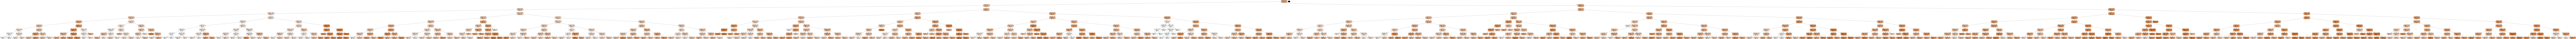

In [20]:
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(song_tree, out_file=dot_data,  
                     feature_names=important_cols,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

Tree is too large to visualize properly.

In [21]:
pred = song_tree.predict(X_test) 
error = mean_absolute_error(y_test, pred) 
error

0.1494240413471157

### Bagging Trees

In [22]:
from sklearn.ensemble import BaggingRegressor
bagging_song_tree = BaggingRegressor(DecisionTreeRegressor(random_state=0), 
                                      n_estimators=50,
                                      n_jobs=-1)

bagging_song_tree.fit(X_train, y_train)

pred = bagging_song_tree.predict(X_test) #make prediction on test set
error = mean_absolute_error(y_test, pred) #calculate mae
error

0.12296995176169834

Bagging trees is the best estimator so far, but we will try also extremely randomized trees and support vector machines.

### Extremely Randomized Forests

In [23]:
from sklearn.ensemble import ExtraTreesRegressor

extremely_rts = ExtraTreesRegressor(n_estimators=50, 
                                     max_depth=None,
                                     min_samples_split=2)
extremely_rts.fit(X_train, y_train)

pred = extremely_rts.predict(X_test) #make prediction on test set
error = mean_absolute_error(y_test, pred) #calculate mae
error

0.11845551761698353

Random forests is the best model so far with a striking improvement in MAE, so we will explore the importance of the columns here.

In [24]:
import numpy as np

importances = extremely_rts.feature_importances_

std = np.std([tree.feature_importances_ for tree in extremely_rts.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], important_cols[indices[f]], importances[indices[f]]))

1. feature 0 danceability (0.217409)
2. feature 1 energy (0.211978)
3. feature 3 loudness (0.097128)
4. feature 6 acousticness (0.096678)
5. feature 8 duration_ms (0.093137)
6. feature 7 tempo (0.088417)
7. feature 5 speechiness (0.078079)
8. feature 2 key (0.068234)
9. feature 4 mode (0.031102)
10. feature 9 time_signature (0.017837)


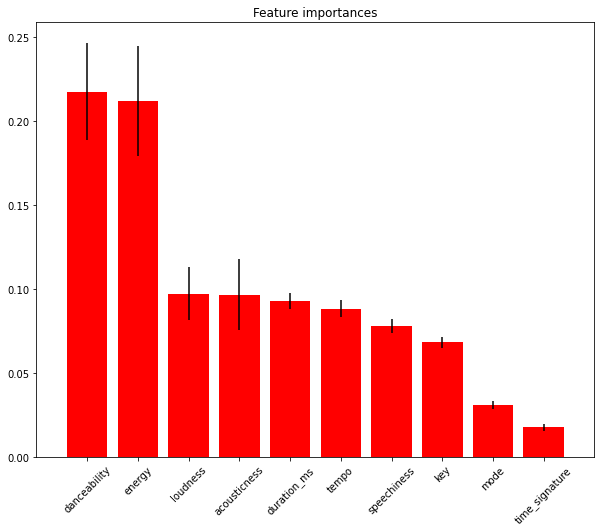

In [25]:
# Plot the feature importances of the forest
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        tick_label=[important_cols[x] for x in indices],
        color="r", yerr=std[indices], align="center")
plt.xlim([-1, X_train.shape[1]])
_ = plt.xticks(rotation=45)

As we had already discovered in linear regression, the most influential variables are `danceability` and `energy`. Also, `time signature` and `mode` do not highly contribute to the score.

### Support Vector Machines

In [26]:
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [27]:
pred = regr.predict(X_test) #make prediction on test set
error = mean_absolute_error(y_test, pred) #calculate mae
error

0.15218311951199354

Support vector machines did not improve at all the estimations from random forests.

### Neural Network

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
INPUT_SIZE = len(important_cols)


We construct a simple neural network containing:
* A normalization layer
* 2 dense layers with `relu` as activation function
* The output layer.

We start by constructing the normalization layer.

In [30]:
from tensorflow.keras.layers.experimental import preprocessing

normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))
with np.printoptions(precision=2):
    print(normalizer.mean.numpy())
    print(normalizer.variance.numpy())
    print(normalizer.count.numpy())

[[ 6.42e-01  6.22e-01  5.34e+00 -7.56e+00  5.75e-01  1.03e-01  3.02e-01
   1.21e+02  2.12e+05  3.94e+00]]
[[2.74e-02 4.57e-02 1.30e+01 2.51e+01 2.44e-01 1.05e-02 8.72e-02 9.18e+02
  4.10e+09 1.27e-01]]
11996


In [31]:
from tensorflow.keras import layers

def build_compile_model():
    model = keras.Sequential([
        normalizer,
        layers.Dense(INPUT_SIZE ** 2, activation='relu'),
        layers.Dense(INPUT_SIZE ** 2, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

model = build_compile_model()

The network is the following:

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense (Dense)               (None, 100)               1100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,322
Trainable params: 11,301
Non-trainable params: 21
_________________________________________________________________


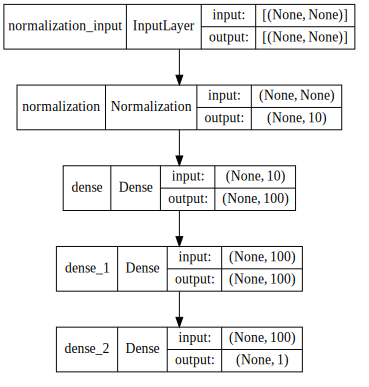

In [33]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [34]:
num_epochs = 100

history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1)

Epoch 1/100
300/300 [==============================] - 1s 2ms/step - loss: 0.1764 - val_loss: 0.1608
Epoch 2/100
300/300 [==============================] - 0s 1ms/step - loss: 0.1569 - val_loss: 0.1550
Epoch 3/100
300/300 [==============================] - 0s 2ms/step - loss: 0.1521 - val_loss: 0.1554
Epoch 4/100
300/300 [==============================] - 0s 2ms/step - loss: 0.1495 - val_loss: 0.1565
Epoch 5/100
300/300 [==============================] - 0s 1ms/step - loss: 0.1469 - val_loss: 0.1510
Epoch 6/100
300/300 [==============================] - 0s 1ms/step - loss: 0.1457 - val_loss: 0.1496
Epoch 7/100
300/300 [==============================] - 0s 1ms/step - loss: 0.1441 - val_loss: 0.1501
Epoch 8/100
300/300 [==============================] - 1s 2ms/step - loss: 0.1423 - val_loss: 0.1483
Epoch 9/100
300/300 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1503
Epoch 10/100
300/300 [==============================] - 1s 2ms/step - loss: 0.1404 - val_lo

300/300 [==============================] - 0s 1ms/step - loss: 0.0967 - val_loss: 0.1475
Epoch 82/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0971 - val_loss: 0.1470
Epoch 83/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0967 - val_loss: 0.1483
Epoch 84/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0962 - val_loss: 0.1485
Epoch 85/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0960 - val_loss: 0.1471
Epoch 86/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0958 - val_loss: 0.1473
Epoch 87/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0955 - val_loss: 0.1460
Epoch 88/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0948 - val_loss: 0.1453
Epoch 89/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0943 - val_loss: 0.1474
Epoch 90/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0947 - val_loss: 

In [35]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

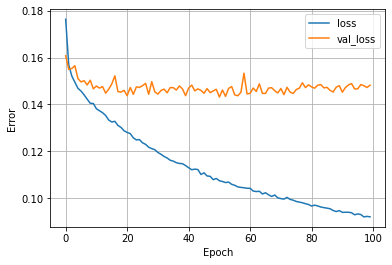

In [36]:
plot_loss(history)

In [37]:
model.evaluate(X_test, y_test, verbose=0)

0.14509618282318115

As we can notice, error stabilizes and slightly increases after approximately 40 epochs.

## Evaluating given test data

Finally, we will evaluate the best non-connectivist approach (Random Forests) and the neural network for the given test track ids. `test_tracks.csv` was also created in `get_songs` notebook.

In [38]:
given_test = pd.read_csv("test_tracks.csv")
given_test

,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,7lPN2DXiMsVn7XUKtOW1CS,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,audio_features,7lPN2DXiMsVn7XUKtOW1CS,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...,https://api.spotify.com/v1/audio-analysis/7lPN...,242014,4
1,5QO79kh1waicV47BqGRL3g,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,audio_features,5QO79kh1waicV47BqGRL3g,spotify:track:5QO79kh1waicV47BqGRL3g,https://api.spotify.com/v1/tracks/5QO79kh1waic...,https://api.spotify.com/v1/audio-analysis/5QO7...,215627,4
2,0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
3,4MzXwWMhyBbmu6hOcLVD49,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,audio_features,4MzXwWMhyBbmu6hOcLVD49,spotify:track:4MzXwWMhyBbmu6hOcLVD49,https://api.spotify.com/v1/tracks/4MzXwWMhyBbm...,https://api.spotify.com/v1/audio-analysis/4MzX...,205090,4
4,5Kskr9LcNYa0tpt5f0ZEJx,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,audio_features,5Kskr9LcNYa0tpt5f0ZEJx,spotify:track:5Kskr9LcNYa0tpt5f0ZEJx,https://api.spotify.com/v1/tracks/5Kskr9LcNYa0...,https://api.spotify.com/v1/audio-analysis/5Ksk...,205458,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,4lUmnwRybYH7mMzf16xB0y,0.596,0.650,9,-5.167,1,0.3370,0.13800,0.000000,0.1400,0.188,133.997,audio_features,4lUmnwRybYH7mMzf16xB0y,spotify:track:4lUmnwRybYH7mMzf16xB0y,https://api.spotify.com/v1/tracks/4lUmnwRybYH7...,https://api.spotify.com/v1/audio-analysis/4lUm...,257428,4
1158,1fzf9Aad4y1RWrmwosAK5y,0.588,0.850,4,-6.431,1,0.0318,0.16800,0.002020,0.0465,0.768,93.003,audio_features,1fzf9Aad4y1RWrmwosAK5y,spotify:track:1fzf9Aad4y1RWrmwosAK5y,https://api.spotify.com/v1/tracks/1fzf9Aad4y1R...,https://api.spotify.com/v1/audio-analysis/1fzf...,187310,4
1159,3E3pb3qH11iny6TFDJvsg5,0.754,0.660,0,-6.811,1,0.2670,0.17900,0.000000,0.1940,0.316,83.000,audio_features,3E3pb3qH11iny6TFDJvsg5,spotify:track:3E3pb3qH11iny6TFDJvsg5,https://api.spotify.com/v1/tracks/3E3pb3qH11in...,https://api.spotify.com/v1/audio-analysis/3E3p...,209299,4
1160,3yTkoTuiKRGL2VAlQd7xsC,0.584,0.836,0,-4.925,1,0.0790,0.05580,0.000000,0.0663,0.484,104.973,audio_features,3yTkoTuiKRGL2VAlQd7xsC,spotify:track:3yTkoTuiKRGL2VAlQd7xsC,https://api.spotify.com/v1/tracks/3yTkoTuiKRGL...,https://api.spotify.com/v1/audio-analysis/3yTk...,202204,4


In [39]:
X_given_test = given_test.loc[:, important_cols].values
y_given_test = given_test['valence'].values

The error from the neural network is the following.

In [40]:
model.evaluate(X_given_test, y_given_test, verbose=0)

0.12988047301769257

Then, the random forests model will be used (it was the best approach from the non-connectivist ones).

In [41]:
pred = extremely_rts.predict(X_given_test)
error = mean_absolute_error(y_given_test, pred)
error

0.06402347762478502

Thus, the neural network did not manage to improve random forests' predictions. A possible reason for this may be that a search for a special neural network solving similar problems should have been made. The current network may be too simple, thus the random forest algorithm is, for the time being, working better.